<a href="https://colab.research.google.com/github/emerging-pc/Mine-Major-Projects/blob/main/ML_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [ ]:
df = pd.read_excel('/content/dataset.xlsm')

In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.replace('?', np.nan, inplace = True)

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,0.0
mean,203.954000,38.948000,546238.64800,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.839000,0.992000,1.487000,52761.940000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.074784,9.137238,256977.27474,611.660616,244.085965,2.296640e+06,71677.698447,27862.892331,28094.723968,6.949055,1.018541,0.819854,1.110965,26392.728276,4879.324055,4823.117132,18879.954326,6.013855,NaN
min,0.000000,19.000000,100804.00000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.25000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41812.500000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.00000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.000000,1.000000,1.000000,58055.000000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.75000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70592.500000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.00000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           3000 non-null   int64  
 1   age                          3000 non-null   int64  
 2   policy_number                3000 non-null   int64  
 3   policy_bind_date             3000 non-null   object 
 4   policy_state                 3000 non-null   object 
 5   policy_csl                   3000 non-null   object 
 6   policy_deductable            3000 non-null   int64  
 7   policy_annual_premium        3000 non-null   float64
 8   umbrella_limit               3000 non-null   int64  
 9   insured_zip                  3000 non-null   int64  
 10  insured_sex                  3000 non-null   object 
 11  insured_education_level      3000 non-null   object 
 12  insured_occupation           3000 non-null   object 
 13  insured_hobbies   

**Data Pre-Processing**

In [ ]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  534
incident_severity                 0
authorities_contacted           273
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

**Visualizing Missing Values**

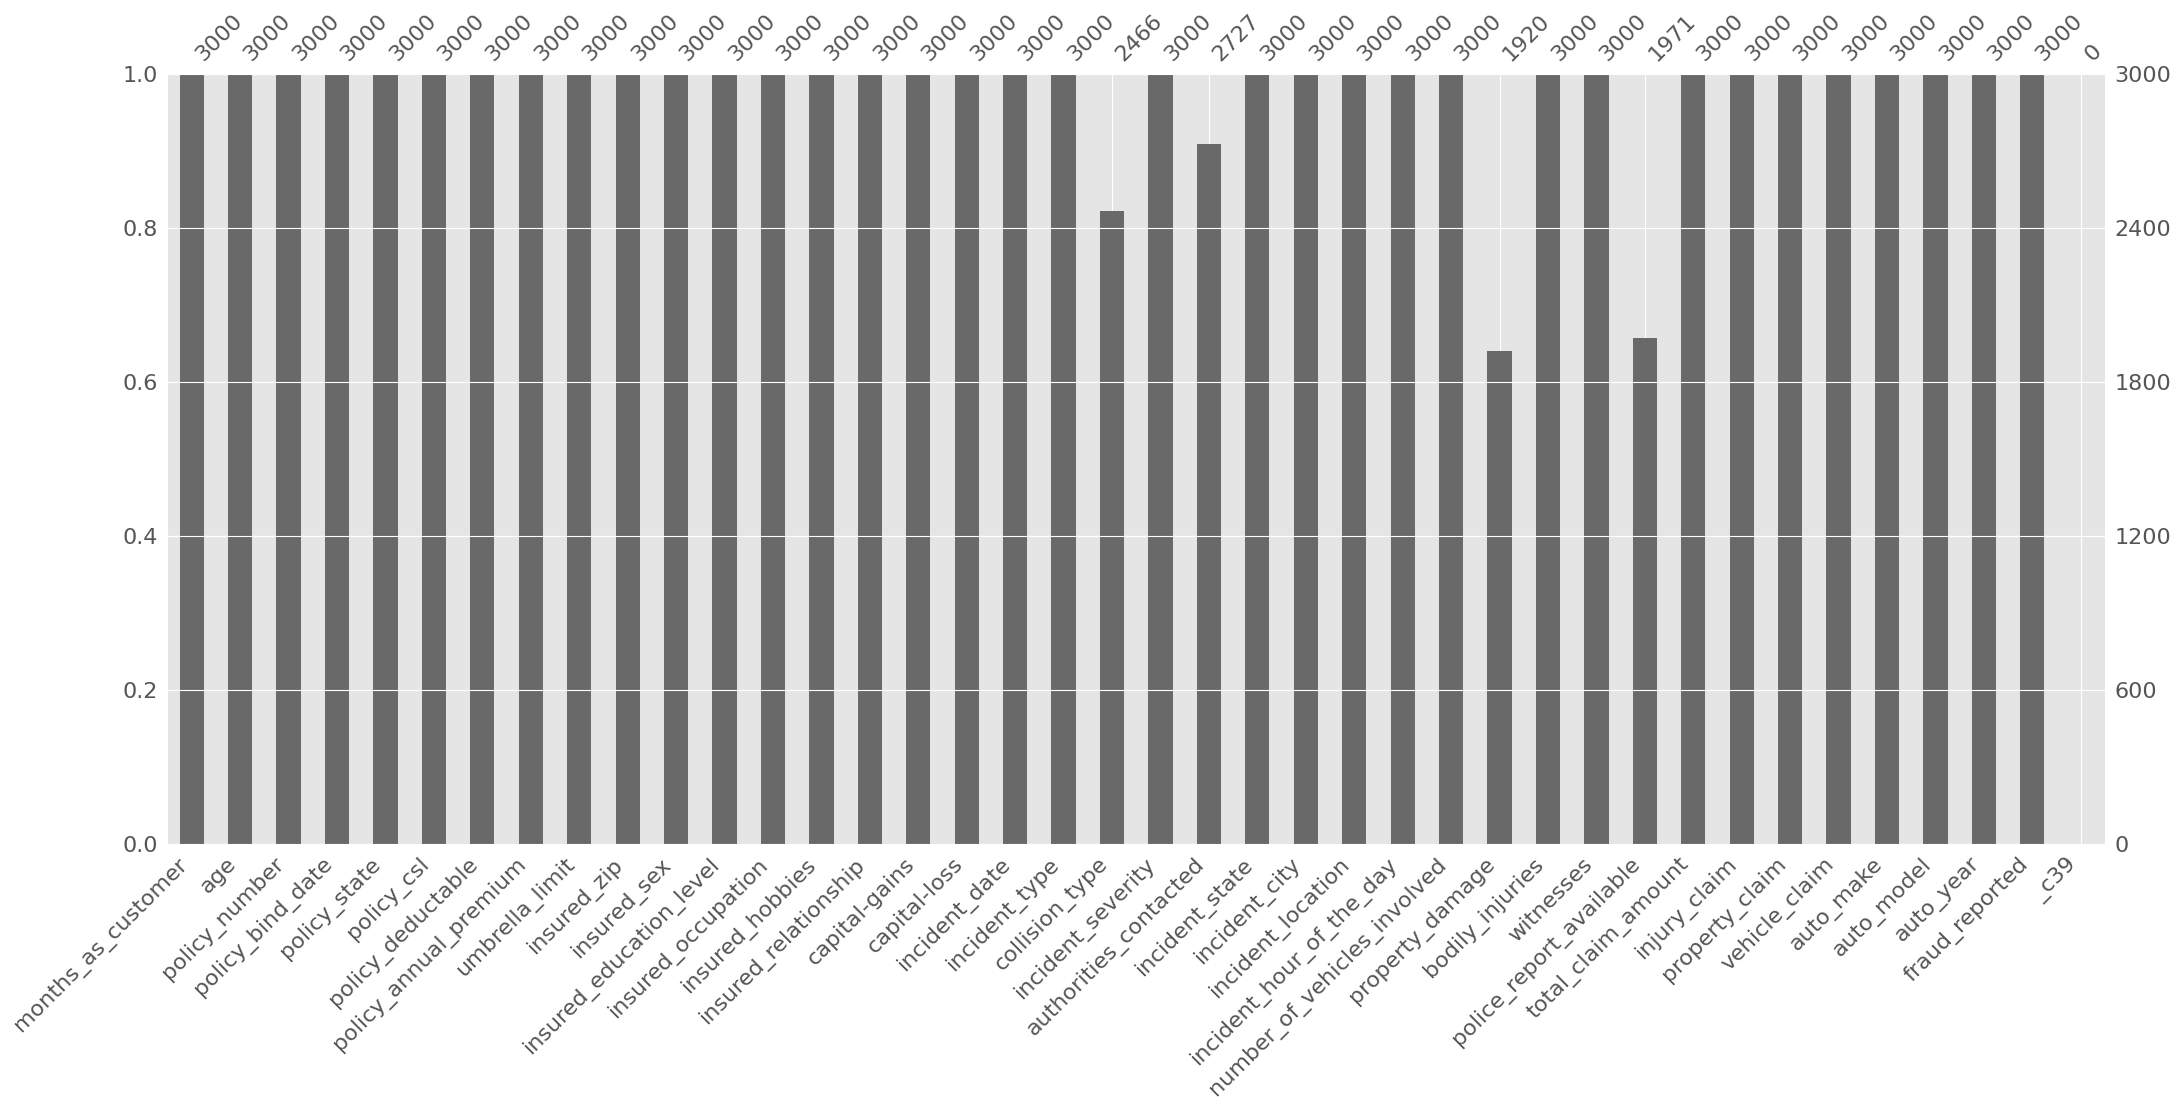

In [ ]:
import missingno as msno

msno.bar(df)
plt.show()

In [ ]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Count the number of columns with missing values
num_columns_with_missing_values = (missing_values > 0).sum()

# Print a summary of missing values
total_columns = len(df.columns)
print(f"Among {total_columns} columns, {num_columns_with_missing_values} have missing values.")

Among 40 columns, 5 have missing values.


**Handling missing values**

In [ ]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [ ]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [ ]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [ ]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted           273
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

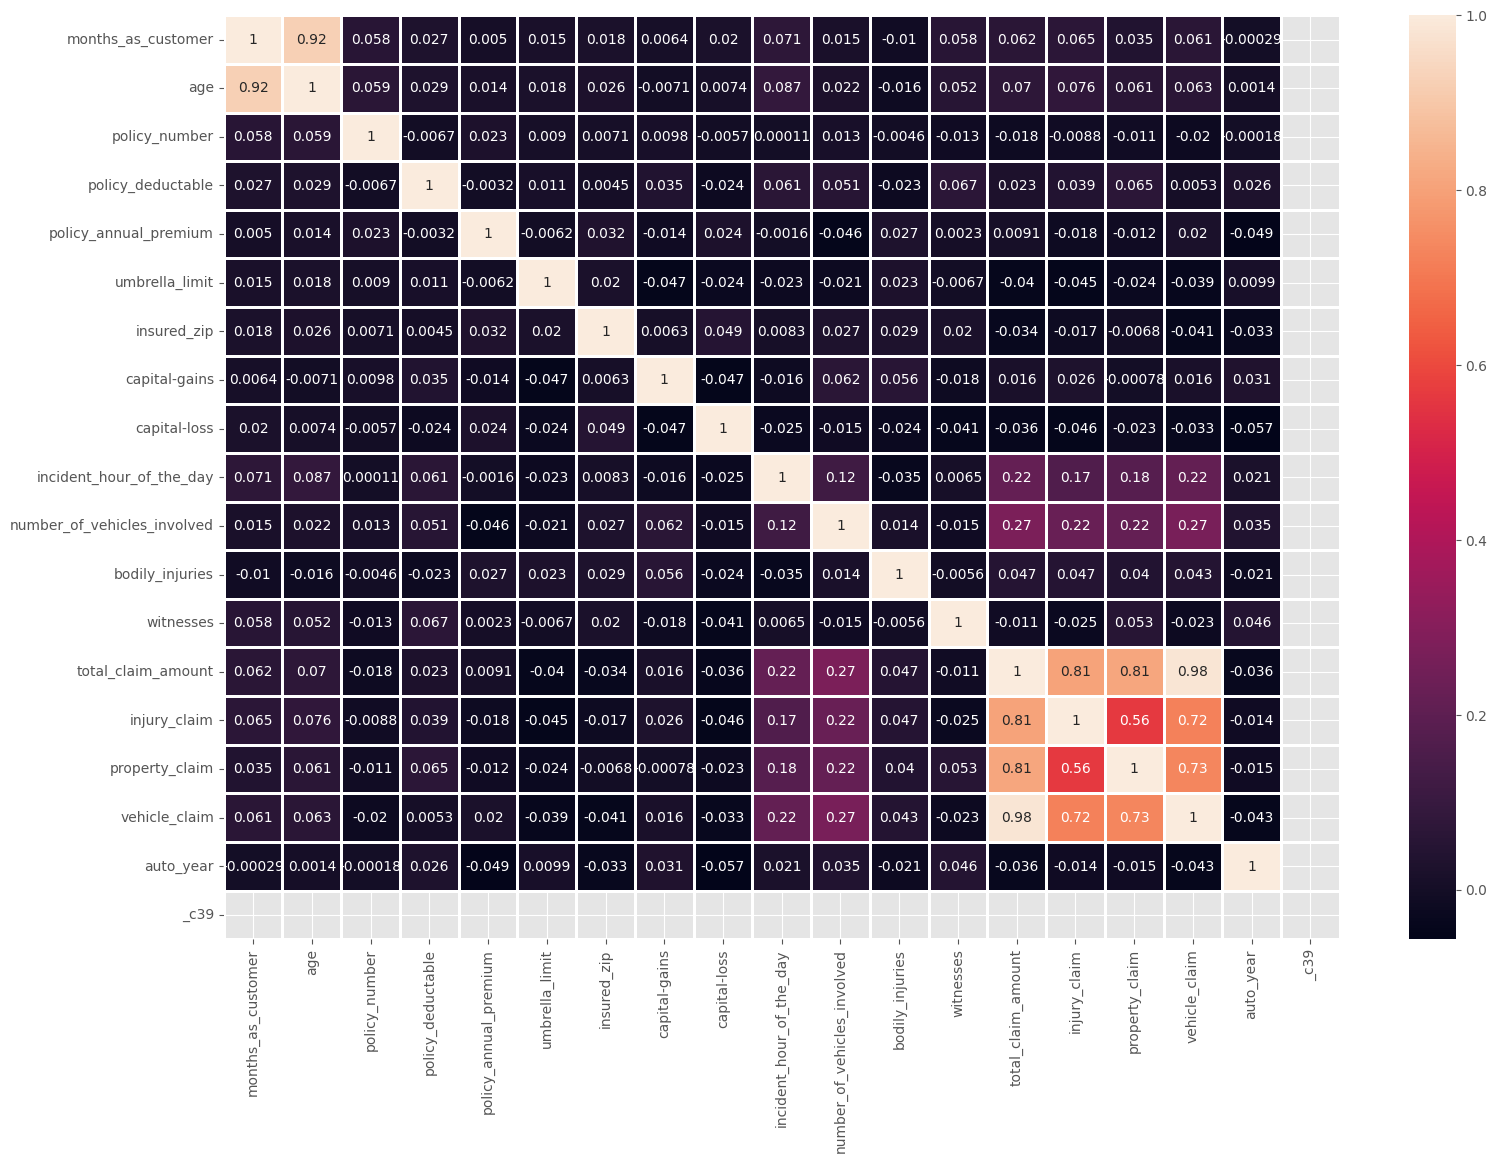

In [ ]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(18, 12))

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1)
plt.show()

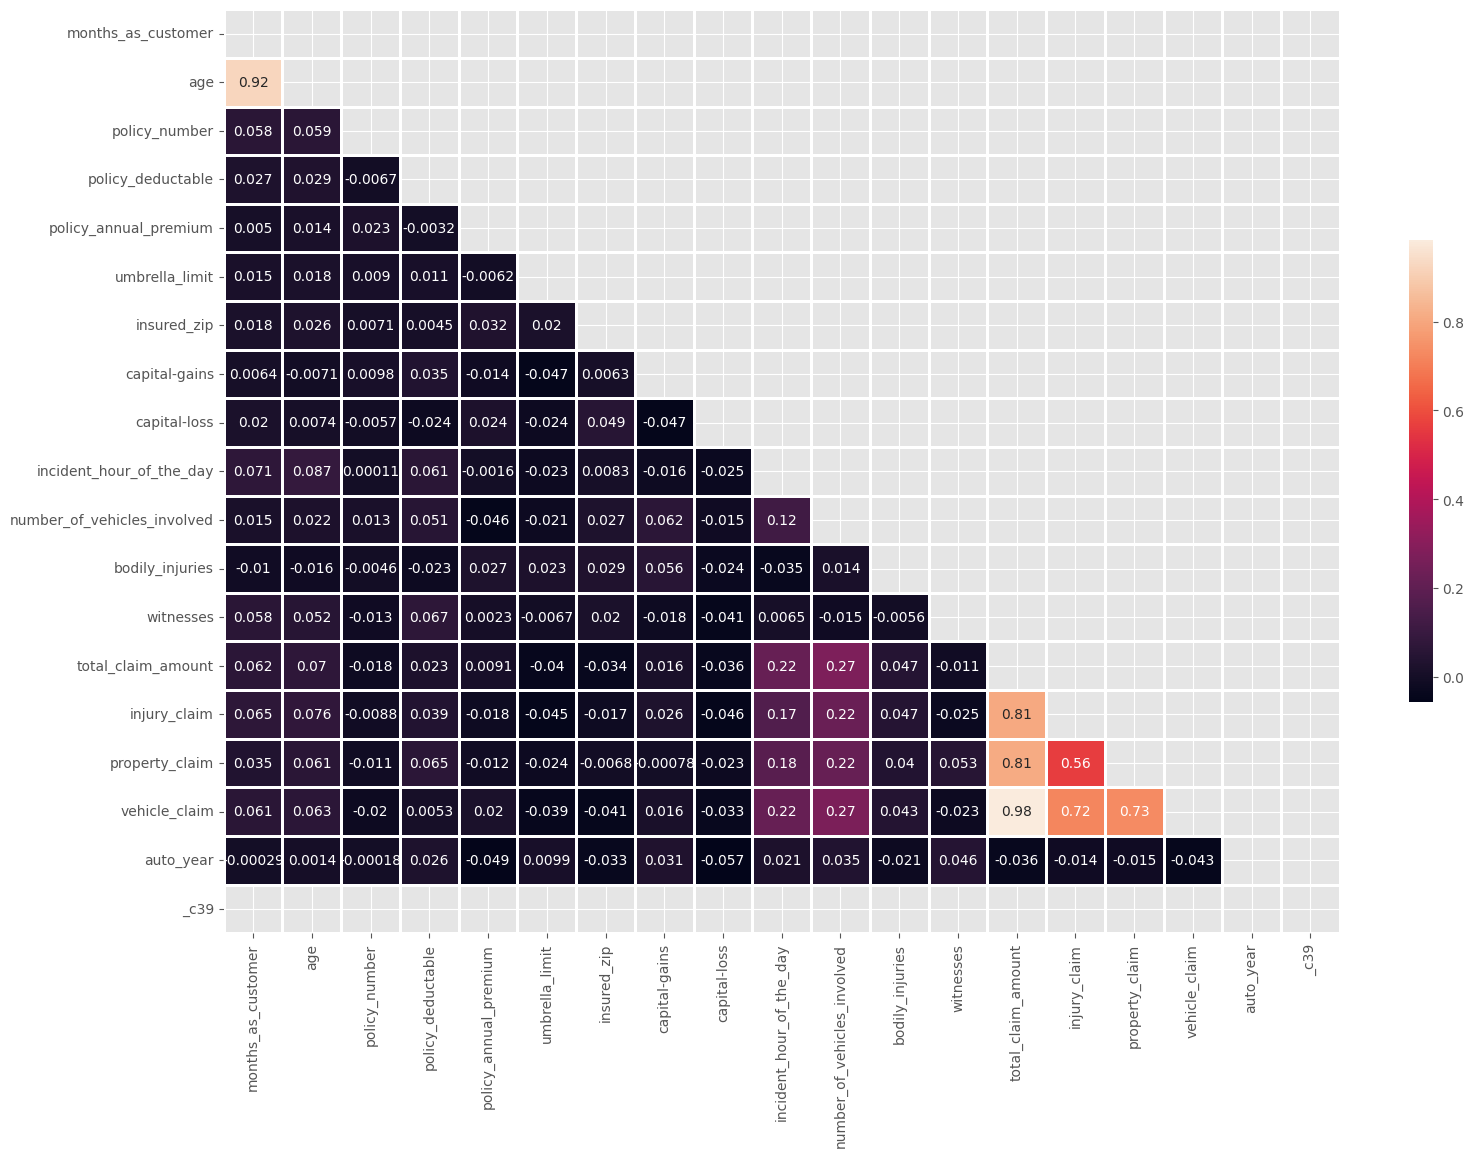

In [ ]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Display the half heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2g', linewidths=1,  cbar_kws={"shrink": .5})
plt.show()

In [ ]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date               1832
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                   114
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [ ]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df.drop(to_drop, inplace = True, axis = 1)


In [ ]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,_c39
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,YES,1,2,YES,71610,6510,13020,52080,Y,NaN
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,NO,0,0,NO,5070,780,780,3510,Y,NaN
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,NO,2,3,NO,34650,7700,3850,23100,N,NaN
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,NO,1,2,NO,63400,6340,6340,50720,Y,NaN
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,NO,0,1,NO,6500,1300,650,4550,N,NaN


From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [ ]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [ ]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,_c39
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,1,YES,1,2,YES,6510,13020,52080,Y,NaN
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,1,NO,0,0,NO,780,780,3510,Y,NaN
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,3,NO,2,3,NO,7700,3850,23100,N,NaN
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,1,NO,1,2,NO,6340,6340,50720,Y,NaN
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,1,NO,0,1,NO,1300,650,4550,N,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           3000 non-null   int64  
 1   policy_csl                   3000 non-null   object 
 2   policy_deductable            3000 non-null   int64  
 3   policy_annual_premium        3000 non-null   float64
 4   umbrella_limit               3000 non-null   int64  
 5   insured_sex                  3000 non-null   object 
 6   insured_education_level      3000 non-null   object 
 7   insured_occupation           3000 non-null   object 
 8   insured_relationship         3000 non-null   object 
 9   capital-gains                3000 non-null   int64  
 10  capital-loss                 3000 non-null   int64  
 11  incident_type                3000 non-null   object 
 12  collision_type               3000 non-null   object 
 13  incident_severity 

In [ ]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

Encoding Categorical columns

In [ ]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [ ]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,NaN,NO,NO


In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' nan 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [ ]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [ ]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False


In [ ]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [ ]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [ ]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [ ]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,True,False,False,False,False,False,False,False


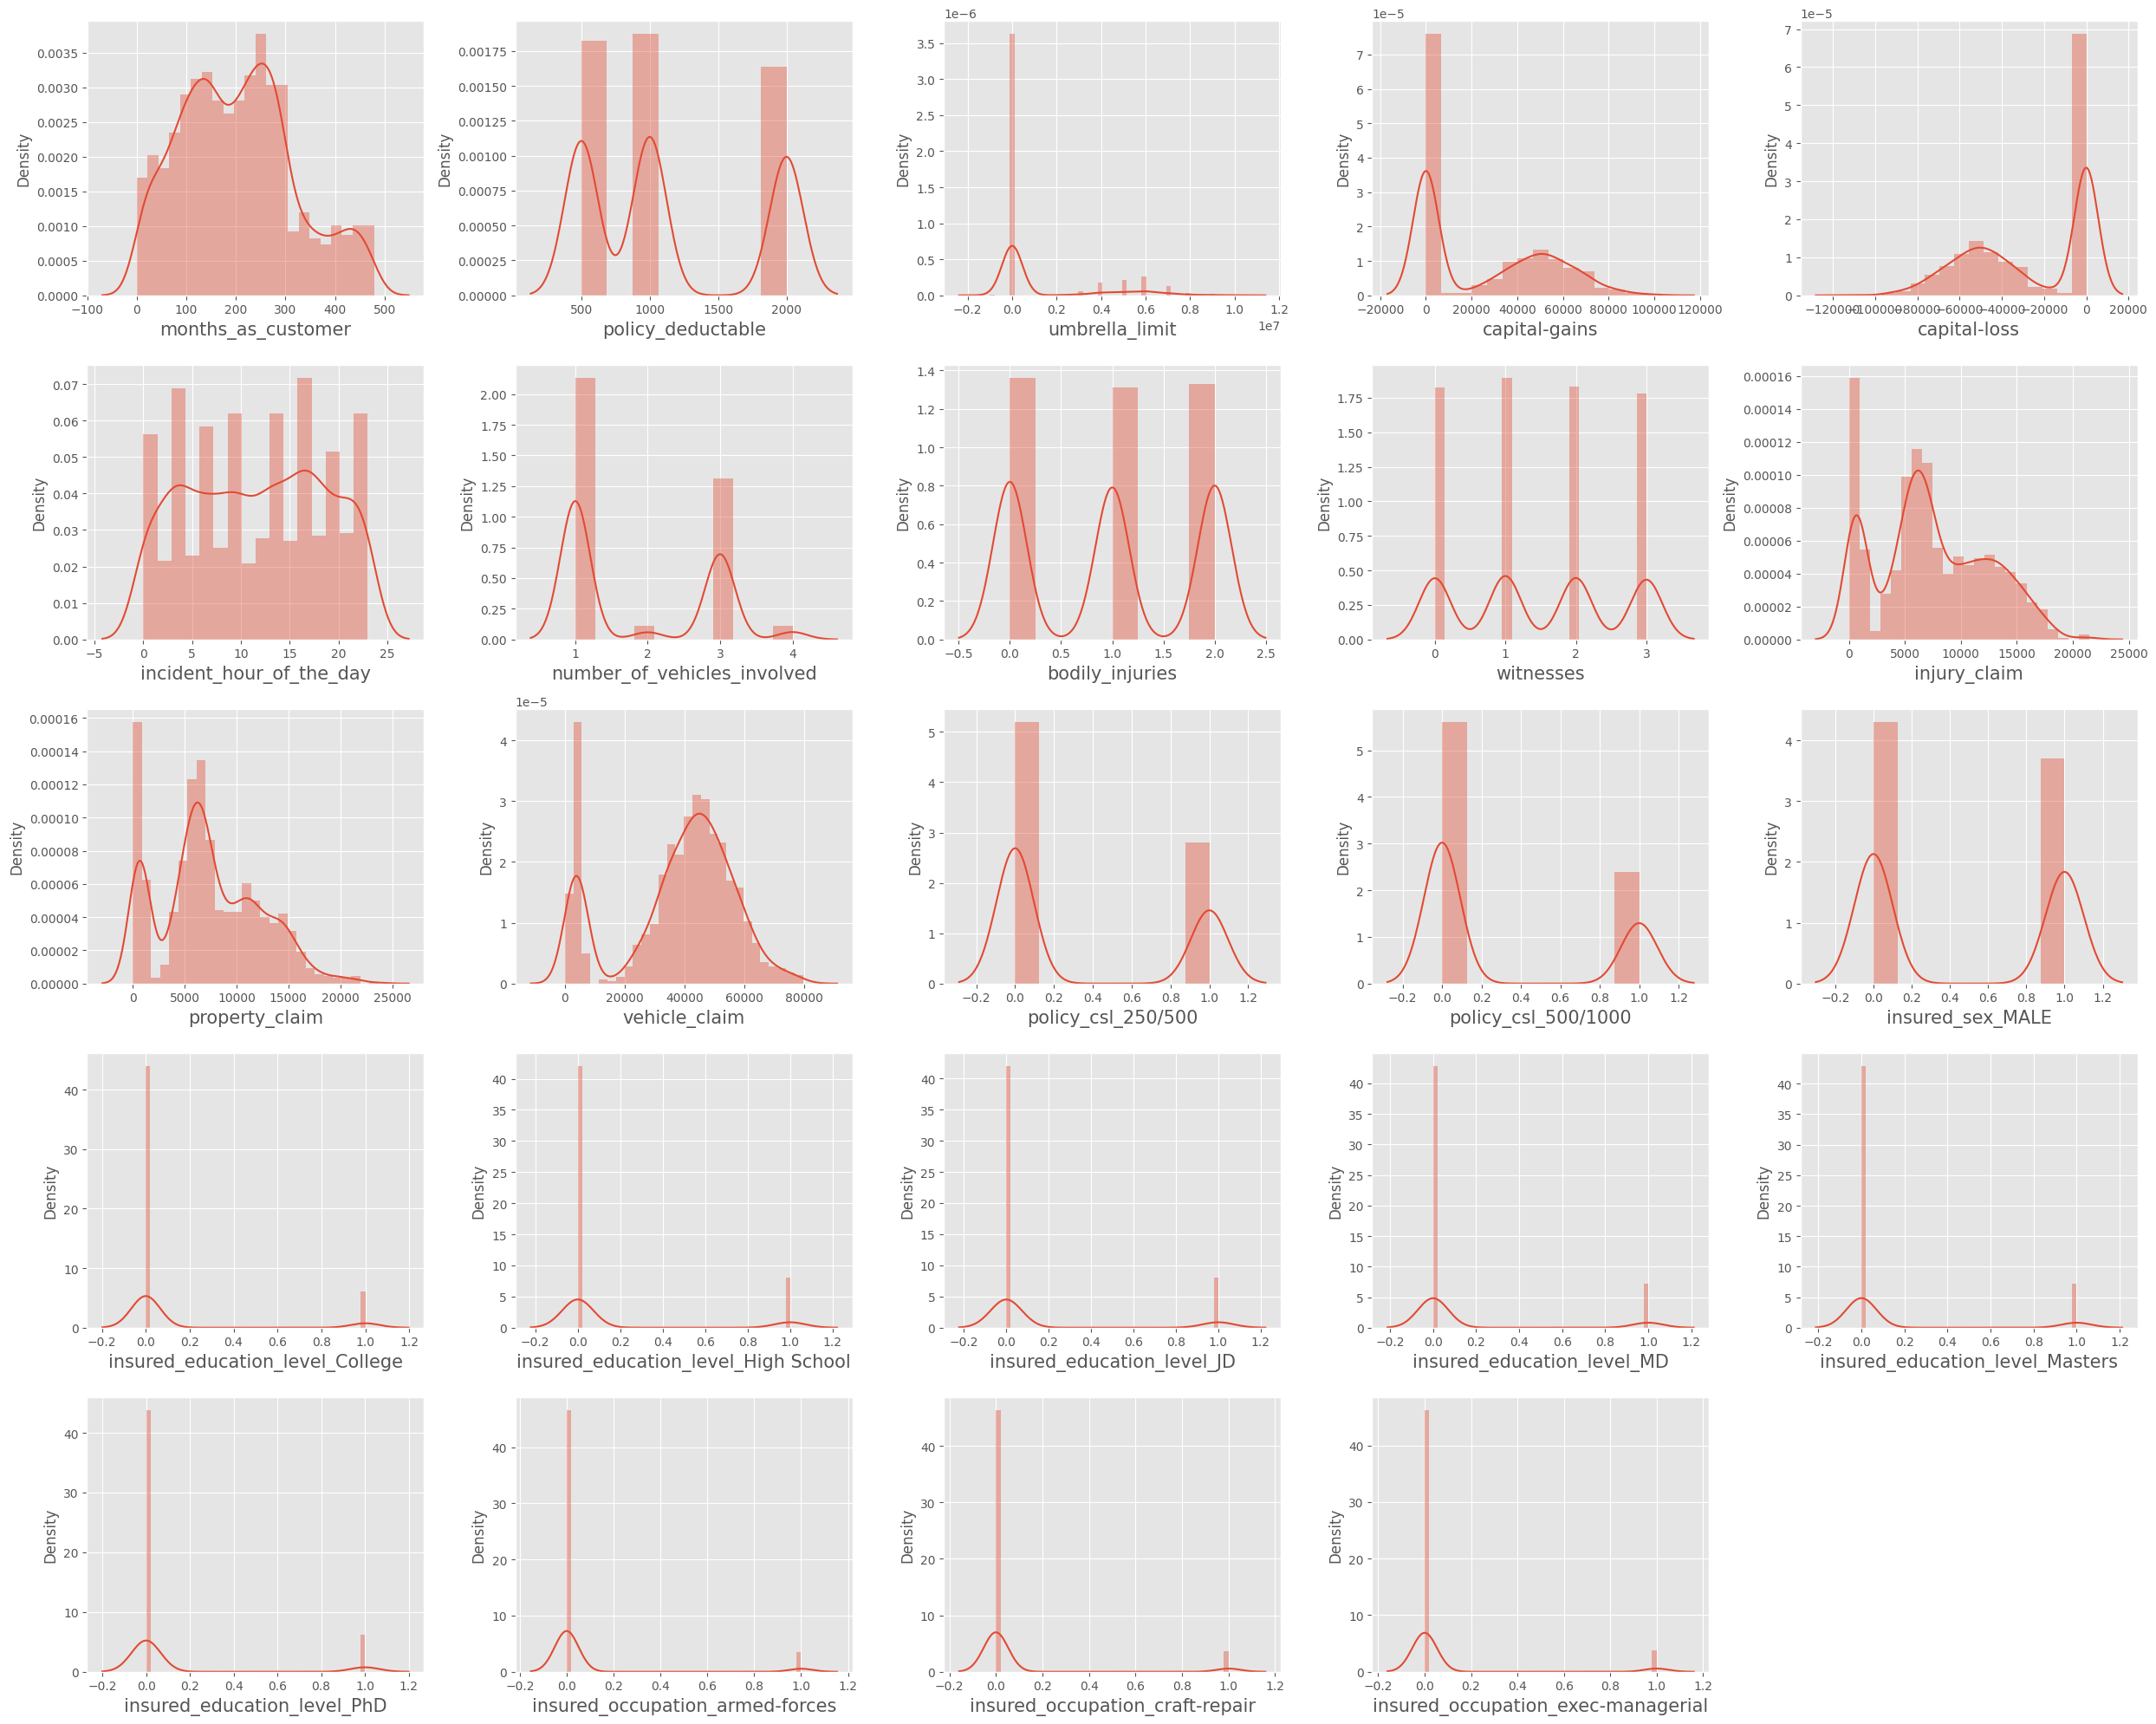

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

Outliers Detection

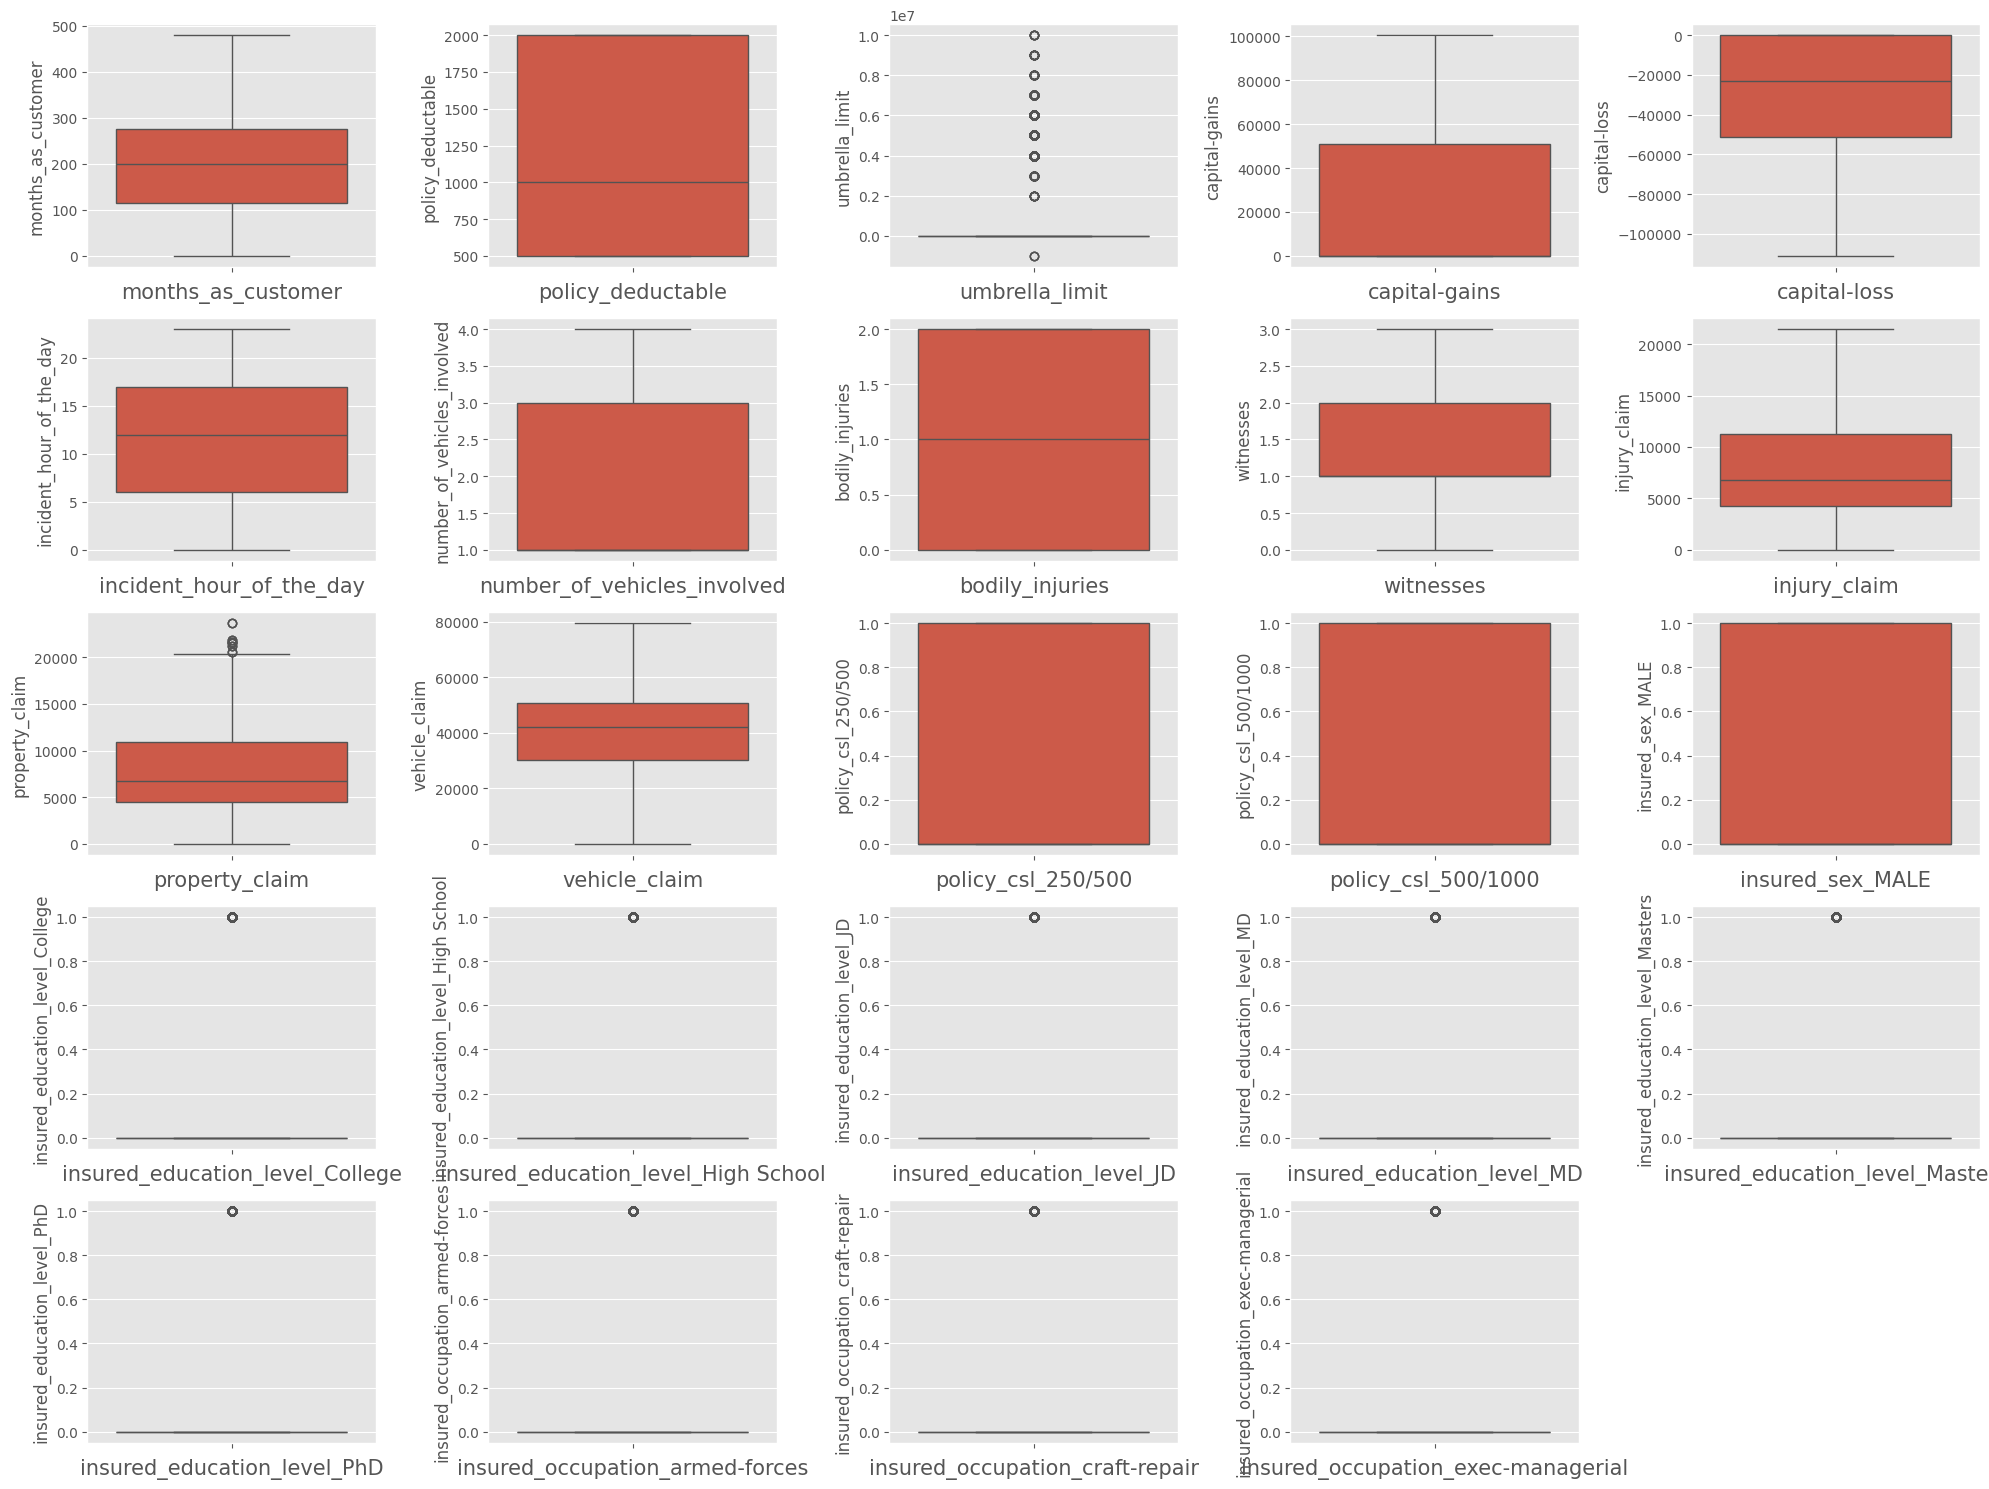

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later

In [ ]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
1058,11,2000,0,56600,-45800,22,1,0,1,7310,...,False,False,False,True,False,False,False,False,True,False
982,230,2000,0,28900,0,0,3,0,3,5190,...,False,False,True,False,False,False,False,True,False,True
1194,73,2000,4000000,29300,0,9,3,0,1,5020,...,True,False,False,True,False,False,True,False,False,True
177,261,1000,0,0,-45100,16,1,0,1,11380,...,True,False,True,False,False,True,False,False,True,False
2602,16,1000,0,59300,-31400,0,1,2,1,10000,...,True,False,False,True,False,False,True,False,False,False


In [ ]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [ ]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [ ]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
1058,-1.662609,1.412390,-0.478309,1.143100,-0.672351,1.494452,-0.817601,-1.215549,-0.428424,-0.028913,-0.023820,0.696192
982,0.257931,1.412390,-0.478309,0.139454,0.960108,-1.664323,1.150941,-1.215549,1.375044,-0.465270,0.612747,-0.093949
1194,-1.118894,1.412390,1.279462,0.153947,0.960108,-0.372097,1.150941,-1.215549,-0.428424,-0.500261,-1.539554,-0.157310
177,0.529788,-0.223162,-0.478309,-0.907671,-0.647401,0.632967,-0.817601,-1.215549,-0.428424,0.808810,0.820098,0.092405
2602,-1.618761,-0.223162,-0.478309,1.240929,-0.159089,-1.664323,-0.817601,1.224224,-0.428424,0.524766,0.533954,-0.164764


In [ ]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [ ]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [ ]:

X_train.head()


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
1058,-1.662609,1.412390,-0.478309,1.143100,-0.672351,1.494452,-0.817601,-1.215549,-0.428424,-0.028913,...,False,False,False,True,False,False,False,False,True,False
982,0.257931,1.412390,-0.478309,0.139454,0.960108,-1.664323,1.150941,-1.215549,1.375044,-0.465270,...,False,False,True,False,False,False,False,True,False,True
1194,-1.118894,1.412390,1.279462,0.153947,0.960108,-0.372097,1.150941,-1.215549,-0.428424,-0.500261,...,True,False,False,True,False,False,True,False,False,True
177,0.529788,-0.223162,-0.478309,-0.907671,-0.647401,0.632967,-0.817601,-1.215549,-0.428424,0.808810,...,True,False,True,False,False,True,False,False,True,False
2602,-1.618761,-0.223162,-0.478309,1.240929,-0.159089,-1.664323,-0.817601,1.224224,-0.428424,0.524766,...,True,False,False,True,False,False,True,False,False,False


Models

Suport Vector Classifier

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.9564444444444444
Test accuracy of Support Vector Classifier is : 0.7586666666666667
[[569   0]
 [181   0]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.86       569
           Y       0.00      0.00      0.00       181

    accuracy                           0.76       750
   macro avg       0.38      0.50      0.43       750
weighted avg       0.58      0.76      0.65       750



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7666666666666667
Test accuracy of KNN is : 0.7586666666666667
[[569   0]
 [181   0]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.86       569
           Y       0.00      0.00      0.00       181

    accuracy                           0.76       750
   macro avg       0.38      0.50      0.43       750
weighted avg       0.58      0.76      0.65       750



Decision Tree Classifier

In [ ]:
# Hyper parameter tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate the DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Define the grid of hyperparameters to search
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': range(2, 10, 1),
    'min_samples_leaf': range(2, 10, 1)
}

# Perform the grid search
grid_search = GridSearchCV(dtc, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.8791111111111111


In [ ]:
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.9457777777777778
Test accuracy of Decision Tree is : 0.3546666666666667
[[222 347]
 [137  44]]
              precision    recall  f1-score   support

           N       0.62      0.39      0.48       569
           Y       0.11      0.24      0.15       181

    accuracy                           0.35       750
   macro avg       0.37      0.32      0.32       750
weighted avg       0.50      0.35      0.40       750



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9884444444444445
Test accuracy of Random Forest is : 0.8146666666666667
[[510  59]
 [ 80 101]]
              precision    recall  f1-score   support

           N       0.86      0.90      0.88       569
           Y       0.63      0.56      0.59       181

    accuracy                           0.81       750
   macro avg       0.75      0.73      0.74       750
weighted avg       0.81      0.81      0.81       750



Models Comparison

In [ ]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.814667
0,SVC,0.758667
1,KNN,0.758667
2,Decision Tree,0.354667


In [ ]:
import plotly.express as px

models = [
    {'Model': 'SVC', 'Score': 0.7413},
    {'Model': 'KNN', 'Score': 0.7373},
    {'Model': 'DT', 'Score': 0.7400},
    {'Model': 'RF', 'Score': 0.8187}
]

fig = px.bar(
    data_frame=models,
    x='Model',
    y='Score',
    color='Score',
    template='simple_white',
    title='Models Comparison',
    orientation='v',
    width=500,  # Adjusted width
    height=600  # Adjusted height
)
fig.show()


In [ ]:
import plotly.express as px

models = [
    {'Model': 'SVC', 'Score': 0.7413},
    {'Model': 'KNN', 'Score': 0.7373},
    {'Model': 'DT', 'Score': 0.7400},
    {'Model': 'RF', 'Score': 0.8187}
]

fig = px.bar(
    data_frame=models,
    x='Model',
    y='Score',
    color='Score',
    template='simple_white',
    title='Models Comparison',
    orientation='v',
    width=320,  # Adjusted width
    height=400  # Adjusted height
)

# Manually adjust the width of one bar
fig.update_traces(marker=dict(line=dict(width=3)))

fig.show()
